In [6]:
import pandas as pd
import numpy as np
from visuals import *

In [7]:
# SEE: https://zenodo.org/record/4632335#.YkGzOShBz4c
filename = '../data/GlobalAlienSpeciesFirstRecordDatabase_v2.xlsx'

df_orig = pd.read_excel(filename, sheet_name=None)
# There are 3 sheets of the excel file
print(df_orig.keys())
df_orig = df_orig['GlobalAlienSpeciesFirstRecordDa']
df_orig.info(show_counts=True)



dict_keys(['ReadMe', 'GlobalAlienSpeciesFirstRecordDa', 'References'])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61751 entries, 0 to 61750
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TaxonName         61751 non-null  object
 1   scientificName    61751 non-null  object
 2   Family            57925 non-null  object
 3   Order             60709 non-null  object
 4   Class             60664 non-null  object
 5   Phylum            60793 non-null  object
 6   Taxonomy          57045 non-null  object
 7   OrigName          61751 non-null  object
 8   LifeForm          61571 non-null  object
 9   Region            61751 non-null  object
 10  Island            17552 non-null  object
 11  PresentStatus     33473 non-null  object
 12  FirstRecord       61751 non-null  int64 
 13  FirstRecord_orig  61751 non-null  object
 14  Source            61751 non-null  object
dtypes: int64(1), object(14)
memory us

In [5]:
df = df_orig
col = ['TaxonName', 'Family', 'LifeForm', 'Region']
df = df[col]
df = df.dropna()

# Get the correct one
# df = df[(df['LifeForm'] != 'Insects') & (df['LifeForm'] != 'Vascular plants') & (df['LifeForm'] != 'Fishes') \
#         & (df['LifeForm'] != 'Birds') & (df['LifeForm'] != 'Algae') \
#         & (df['LifeForm'] != 'Invertebrates (excl. Arthropods, Molluscs)') 
#         & (df['LifeForm'] != 'Molluscs') & (df['LifeForm'] != 'Crustaceans') \
#         & (df['LifeForm'] != 'Fungi') & (df['LifeForm'] != 'Reptiles') \
#         # & (df['LifeForm'] != 'Arthropods p.p. (Myriapods, Diplopods etc.)') & (df['LifeForm'] != 'Mammals') \
#         # & (df['LifeForm'] != 'Amphibians') & (df['LifeForm'] != 'Bryophytes') \
#         # & (df['LifeForm'] != 'Amphibians') & (df['LifeForm'] != 'nan') \
#         & (df['LifeForm'] != 'Bryozoa') & (df['LifeForm'] != 'Spiders') \
        # ]
# df = df[(df['FirstRecord'] > 1950) & (df['FirstRecord'] < 2010)]

df = df[df['FirstRecord'] > 1800]
last_year = np.max(df['FirstRecord'])
print(f'The dataset range from 1800 to {last_year}')

The dataset range from 1800 to 2017


In [10]:
df.info(show_counts=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8346 entries, 1 to 61495
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TaxonName  8346 non-null   object
 1   Family     8346 non-null   object
 2   LifeForm   8346 non-null   object
 3   Region     8346 non-null   object
dtypes: object(4)
memory usage: 326.0+ KB


,TaxonName,Family,LifeForm,Region
1,Acanthophora nayadiformis,Rhodomelaceae,Algae,Cyprus
36,Agardhiella subulata,Solieriaceae,Algae,United Kingdom
75,Alexandrium tamarense,Ostreopsidaceae,Algae,Ireland
81,Alexandrium tamarense,Ostreopsidaceae,Algae,United Kingdom
95,Anotrichium furcellatum,Wrangeliaceae,Algae,Canary Islands


findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


There are 16 families and 110 regions
There are 4960 species.
Algae[66], Amphibians[20], Arthropods p.p. (Myriapods, Diplopods etc.)[17], Bacteria and protozoans[3], Birds[632], Bryophytes[18], Bryozoa[25], Crustaceans[82], Fishes[254], Fungi[12], Insects[650], Invertebrates (excl. Arthropods, Molluscs)[89], Mammals[124], Molluscs[99], Reptiles[41], Vascular plants[2828], 

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


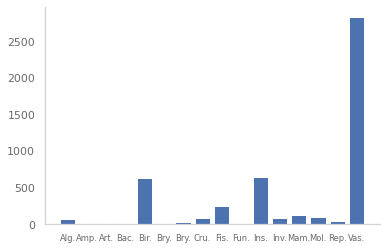

In [11]:
family = df['LifeForm'].unique()
region = df['Region'].unique()

print(f'There are {len(family)} families and {len(region)} regions')
species = df['TaxonName'].unique()

count_animals = []
print(f'There are {len(species)} species.')
for p in family:
    df_s = df[df['LifeForm'] == p]
    animals = df_s['TaxonName'].unique()
    animals = len(animals)
    count_animals.append(animals)
    print(f'{p}[{animals}]', end=', ')

# Plot histogram of families and how many entries
import matplotlib.pyplot as plt

plt.bar(range(len(count_animals)), count_animals, align='center')
firstletter_family = [f[:3]+'.' for f in family]
plt.xticks(range(len(family)), firstletter_family, size='small')
plt.savefig('../../latex/figures/histogram_taxfam.png', dpi=1200)
plt.show()

In [20]:
# Filter out all the irrelevant species and regions
# TODO This is really really really slow. A better way to do it?
# Filter out irrelevant data

spec_iter = np.zeros(len(species), dtype=int)
reg_iter = np.zeros(len(region), dtype=int)

for idx, s in enumerate(species):
    df_s = df[df['TaxonName'] == s]
    # n_iter = len(df_s)
    spec_iter[idx] = len(df_s)
    # print(f'The species {s} has {spec_iter[idx]} iteractions')


for idx, s in enumerate(region):
    df_s = df[df['Region'] == s]
    # n_iter = len(df_s)
    reg_iter[idx] = len(df_s)
    # print(f'The species {s} has {spec_iter[idx]} iteractions')

In [8]:
# TODO This is really really really slow. A better way to do it?
# select the species that have less than 3 iteractions
remove_s_idx = np.where(spec_iter < 3)
remove_r_idx = np.where(reg_iter < 10)

# Filter the dataset: remove all rows belonging to species with less than 3 iteractions
for s in species[remove_s_idx]:
    # print(s)  
    df = df.drop(df[df['TaxonName'] == s].index)

# Filter the dataset: remove all rows belonging to region with less than 10 invasions
for s in region[remove_r_idx]:
    # print(s)  
    df = df.drop(df[df['Region'] == s].index)

species_removed = len(species) - len(df['TaxonName'].unique())
print(f'Removed {species_removed} species')
region_removed = len(region) - len(df['Region'].unique())
print(f'Removed {region_removed} region')

# Update region, species
region = df['Region'].unique()
species = df['TaxonName'].unique()


Removed 17574 species
Removed 63 region


In [12]:
# Buld matrix by grouping the dataset into taxonomic families rather than species to reduce the complexity
n_f = len(family)
n_r = len(region)

t_min = df['FirstRecord'].min()
t_max = df['FirstRecord'].max()
print(t_min, t_max, t_max-t_min)
time_res = 10
time = np.arange(t_min, t_max, time_res)

p = n_f + n_r
M = np.zeros((len(time), n_f, n_r))
# M = np.zeros((len(time), p, p)) # if full

for i, t in enumerate(time):
    df_now = df[(df['FirstRecord'] >= t) & (df['FirstRecord'] < t+(time_res-1))]
    for index, row in df_now.iterrows():
        f = row['LifeForm']
        r = row['Region']
        # print(f'Family {f} invaded region {r} at time {t}')

        f_idx = np.where(family == f)
        r_idx = np.where(region == r)
        M[i, f_idx, r_idx] = 1
M.shape

1801 2020 219


(22, 19, 276)

In [13]:
# Buld matrix
n_s = len(species)
n_r = len(region)

t_min = df['FirstRecord'].min()
t_max = df['FirstRecord'].max()
print(t_min, t_max, t_max-t_min)
time_res = 10
time = np.arange(t_min, t_max, time_res)

p = n_s + n_r
M = np.zeros((len(time), n_s, n_r))
# M = np.zeros((len(time), p, p)) # if full

for i, t in enumerate(time):
    df_now = df[(df['FirstRecord'] >= t) & (df['FirstRecord'] < t+(time_res-1))]
    for index, row in df_now.iterrows():
        s = row['TaxonName']
        r = row['Region']
        # print(f'Species {s} invaded region {r} at time {t}')

        s_idx = np.where(species == s)
        r_idx = np.where(region == r)
        M[i, s_idx, r_idx] = 1
M.shape

1801 2020 219


(22, 23039, 276)

In [10]:
# Export data and then import it into R
print(n_s, n_r)
M = M.reshape(len(time), n_s*n_r)
# M = M.reshape(len(time), (p)**2) # if full matix
print(f's = {n_s}, r = {n_r}')
print(M.shape)
np.save('../data/matrix.npy', M)

5465 213
s = 5465, r = 213
(22, 1164045)


In [2]:
import numpy as np
# load matrix
M = np.load('../data/matrix.npy')

In [34]:
print(f'There are in total {np.sum(M)} iteraction.')
print(M[:10])

There are in total 50986.0 iteraction.
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]